In [8]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [9]:
env = gym.make('MountainCar-v0')
env.reset()

def newreward(pos):
    if(pos >= 0.5):
        #return 2
        return 0
    else:
        #return (pos-(-1.2)/1.8- 1
        return -1

def QLearning(env, learning, epsilon, min_eps, episodes):
    num_states = (env.observation_space.high - env.observation_space.low)*np.array([10, 50])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    Q = np.random.uniform(low = -1, high = 0, size = (num_states[0], num_states[1], env.action_space.n))
    
    reward_list = []
    average_reward_list= []
    
    reduction =  (epsilon - min_eps)/episodes 
    
    eps1 = epsilon
    
    first = episodes + 1
    
    for i in range (episodes):
        done = False
        tot_reward = 0
        reward = 0
        state = env.reset()
        
        state_adj = (state - env.observation_space.low)*np.array([10, 50])
        state_adj= np.round(state_adj, 0).astype(int)
        
        while done != True : 
            if i >= (episodes - 5) or i<5:
                env.render()
                
            if np.random.random()< 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]])
            else:
                action = np.random.randint(0, env.action_space.n)
                
            state2, reward, done, info = env.step(action)
            
            state2_adj = (state2 - env.observation_space.low)*np.array([10,50])
            state2_adj = np.round(state2_adj, 0).astype(int)
                            
            if done and state2[0] >= 0.5:
                    Q[state_adj[0], state_adj[1], action] = reward
            else:
                    delta = learning*(newreward(state[0]) + np.max(Q[state2_adj[0], state2_adj[1]] - Q[state_adj[0], state_adj[1], action]))
                    Q[state_adj[0], state_adj[1], action] += delta
            
            if state2[0] >= 0.5 and i<first:
                    first = i
                    print('First Clear on episode {}'.format(i+1))
                                                  
            tot_reward += newreward(state2[0])
            state_adj = state2_adj
                                                  
        if epsilon > min_eps:
                #epsilon -= reduction
                epsilon *= eps1
        
                            
        reward_list.append(tot_reward)
                                    
        if (i+1) % 100 == 0:
            average_reward = np.mean(reward_list)
            average_reward_list.append(average_reward)
            reward_list = []
                                                
        if (i+1) % 1000 == 0:
            print('Episode {} average reward: {}'.format(i+1, average_reward))
        
    env.close()
                
    return average_reward_list, Q
                                                  

In [10]:
env.reset()
rewards, Qpts = QLearning(env, 0.2, 0.9, 0, 1000)

First Clear on episode 111
Episode 1000 average reward: -193.57


Text(0.5, 1.0, 'Average Reward vs Episodes')

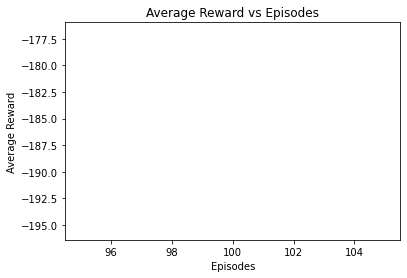

In [7]:
plt.plot(100*(np.arange(len(rewards)) +1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

In [2]:
for i in range (20):
    done1 = False
    state1=env.reset()
    state_adj1 = (state1 - env.observation_space.low)*np.array([10, 50])
    state_adj1= np.round(state_adj1, 0).astype(int)
    while done1 != True:
        env.render()
        action = np.argmax(Qpts[state_adj1[0], state_adj1[1]])
        state3, reward1, done1, info1 = env.step(action)
        state3_adj = (state3 - env.observation_space.low)*np.array([10,50])
        state3_adj = np.round(state3_adj, 0).astype(int)
        state_adj1 = state3_adj

NameError: name 'env' is not defined

In [ ]:
env.close()